<font color='red'>=====================================================================================================================</font>

# <font color='black'>Capstone Project - "Demand Forecasting Using Time Series"  <br> <font color ='grey'>[Exploratory Data Analysis] - Task # 01

### <font color='green'>Frontier Technology Institute</font> 

<font color='red'>=====================================================================================================================</font>

## <font color='Blue'> Data Analysis Approach</font>

This notebook describes the main steps in my analysis of the "Demand Forecasting Using Time Series". The task is about forecasting sales of 50 different items in a list of 5 - years of 10th stores over a three month period. My objective was to get hands-on with a data forecast challenge and understand the structure of the data. I wanted to use this challenge as an opportunity to improve my skill with plotting and analyzing data in Python.

The main phases and findings of my analysis were as follows:

*  This data is clean. It feels like synthetic data.
*  The sales pattern is similar for every item and store.
*  There is  year over year growth in sales volume for which I did not find a clear pattern.
*  There is a repeated seasonal pattern every year.
*  There is a repeated weekly pattern.
*  Within a month, variations are mostly linked to Day-Of-Week.
* The level of sales for a specific day is linked to number of days in a month.

### Import Packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series 
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
sns.axes_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### Loading the datasets

In [12]:
train=pd.read_csv("F:/FTI - Data Science Certification/project/train.csv",parse_dates=True,index_col=['date'])
test=pd.read_csv("F:/FTI - Data Science Certification/project/test.csv",parse_dates=True,index_col=['date'])

In [13]:
train.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [14]:
train.shape,test.shape

((913000, 3), (45000, 3))

In [15]:
train.dtypes,test.dtypes

(store    int64
 item     int64
 sales    int64
 dtype: object,
 id       int64
 store    int64
 item     int64
 dtype: object)

In [16]:
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


Our Training Data is Clean! No missing value and an entry for each row. Just as was announced in the description.

Note that some rows in the data have a zero value. Let's have a quick look at how many they are and at the story, items and dates involved.

In [21]:
ZeroSales = train[train.sales == 0]
ZeroSales

,store,item,sales
date,,,
2014-01-15,6,4,0


There is only one zero entry in the whole training set. Something to keep in mind but probably not statistically significant.

In [68]:
train['year'] = train.index.year
train['month'] = train.index.month
train['day'] = train.index.day
train['weekDay']=train.index.day_name()
train['day_of_week'] = train.index.dayofweek

train.head()

,store,item,sales,year,month,day,day_of_week,weekDay
date,,,,,,,,
2013-01-01,1,1,13,2013,1,1,1,Tuesday
2013-01-02,1,1,11,2013,1,2,2,Wednesday
2013-01-03,1,1,14,2013,1,3,3,Thursday
2013-01-04,1,1,13,2013,1,4,4,Friday
2013-01-05,1,1,10,2013,1,5,5,Saturday


# <font color='purple'> Exploratory Data Analysis & Data Visualization</font>

Let's visualize the data

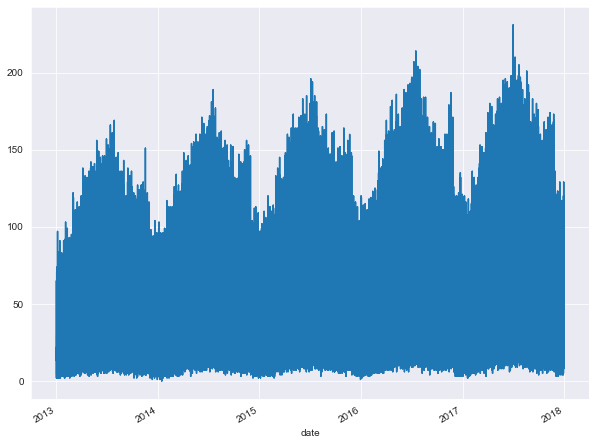

In [23]:
train['sales'].plot(figsize=(10,8))
plt.show()

A generally increasing trend of total sales can be observed from the graph above, with evidence of a pattern for every year.

We observe that sales usually peak during the middle of the year,around the June and July period, before decreasing in the second half of the year

### <font color='green'>Breakdown of sales for each store:

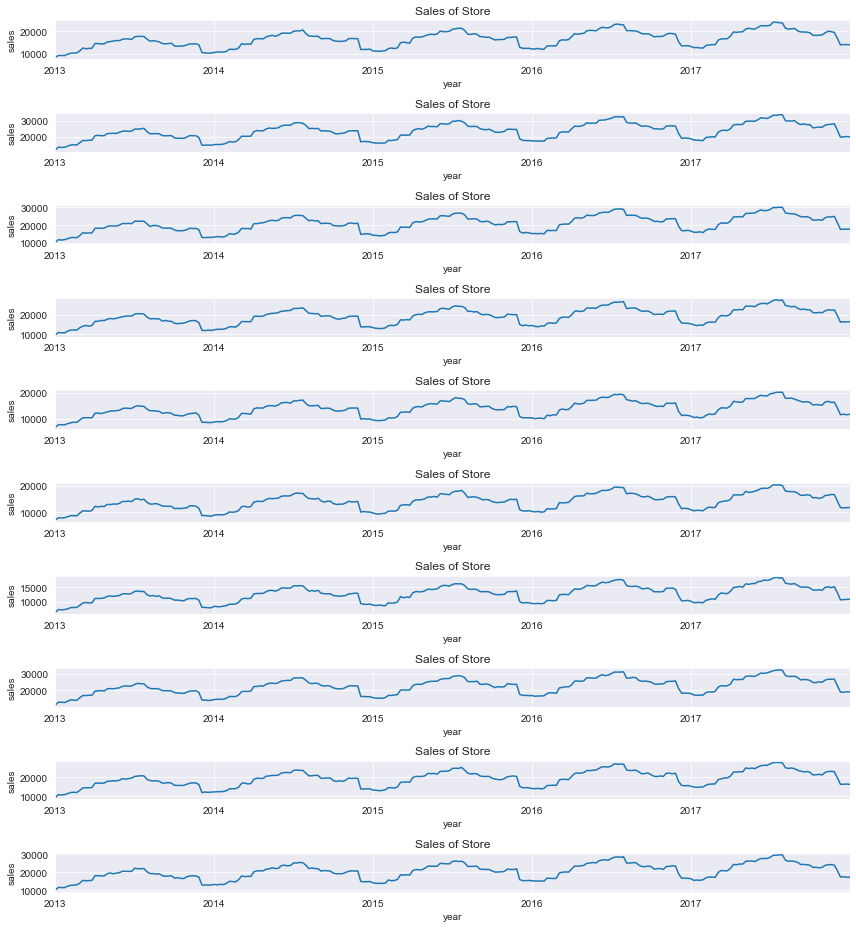

In [104]:
store_count= len(train['store'].unique())
# 10 stores in dataset
fig,axes = plt.subplots(store_count,figsize=(12,13))
# use a for loop to iterate through all 10 stores and plot the graph of resampled 
# total weekly sales data for each store 
for i in train['store'].unique():
    g= train.loc[train['store']==i,'sales'].resample('W').sum()
    ax= g.plot(ax=axes[i-1])
    ax.title.set_text('Sales of Store')
    ax.set_ylabel('sales')
    ax.set_xlabel('year')
fig.tight_layout()

The above graph series further proves our point that the sales have a seasonal pattern. We can see that all stores have similar trends through the duration of the data, albeit with minor differences. With all stores having a seasonal pattern, we can seek to pool them together for our analysis

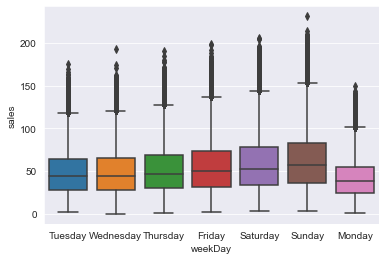

In [76]:
sns.boxplot(x='weekDay',y='sales', data = train,)
plt.show()

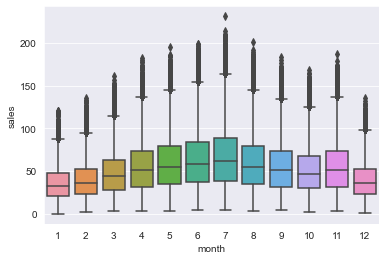

In [78]:
sns.boxplot(x='month',y='sales',data = train,)
plt.show()

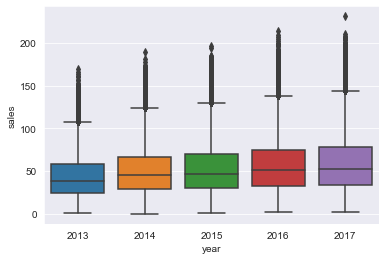

In [83]:
sns.boxplot(x='year',y='sales', data = train,)
plt.show()

It seems like Sunday has the highest median sales among all the days, on month July has the higest median sales and "2017" year has the highest median sales among all the years.

###  >>> Sales by Store

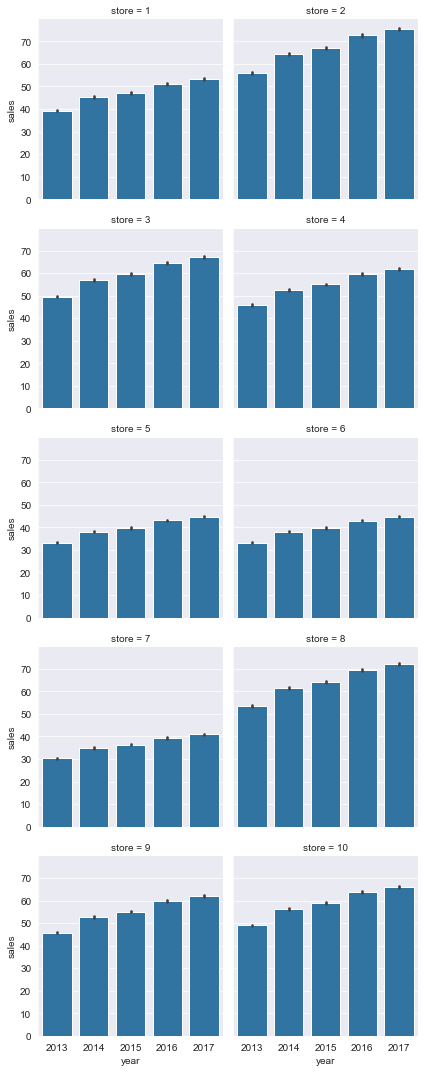

In [32]:
# plot graph of sales over the 5 years
graph_sales= sns.FacetGrid(train,col='store',col_order=[1,2,3,4,5,6,7,8,9,10],col_wrap=2)
graph_sales.map_dataframe(sns.barplot,"year","sales")
plt.show()

From the graph, we can observe that there is a general increasing trend in sales for each store from 2013 to 2017

### >>> Mean Sales by Store

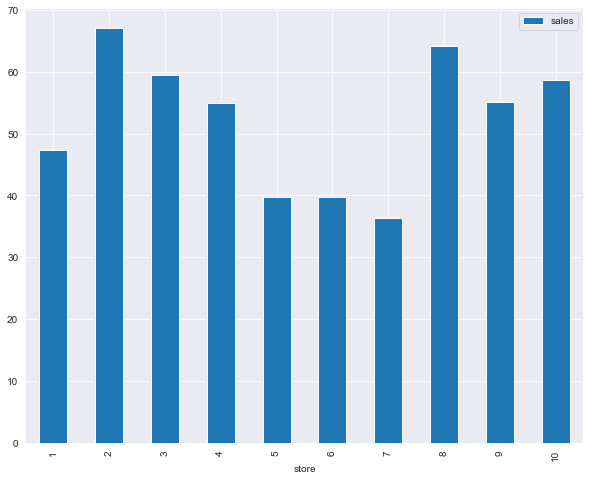

In [33]:
# plot mean sales by store  
overall_sales_by_store= train[['sales','store']].groupby(['store']).mean().plot.bar(figsize=(10,8))

Stores 2 and 8 has the highest mean sales, which could be due to to a variety of reasons, such as being located in an area with heavy customer traffic, or due to better customer services provided

### >>> Mean Sales by Store by month

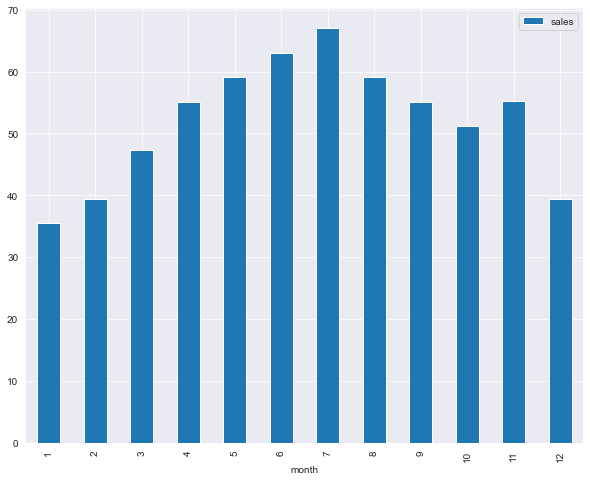

In [35]:
# Plot average Sales by month for all stores 
train[['sales','month']].groupby(['month']).mean().plot.bar(figsize=(10,8))
plt.show()

From the graph, we can observe that there is general increasing mean sales trend, peaking in the month of July before decreasing for the second half of the year onwards. The top 3 months of Sales are: July, June and August.

It is likely that the summer period may be a period of major discounts,such as Summer Sales, or that it is the tourist peak season that could account for the highest sales figures during this period

It is also worthy to see that there is an increase of sales for all stores in the month of November, which could be due to the store running promotions and campaigns such as Black Friday.

### >>> Mean Sales by Store by Year

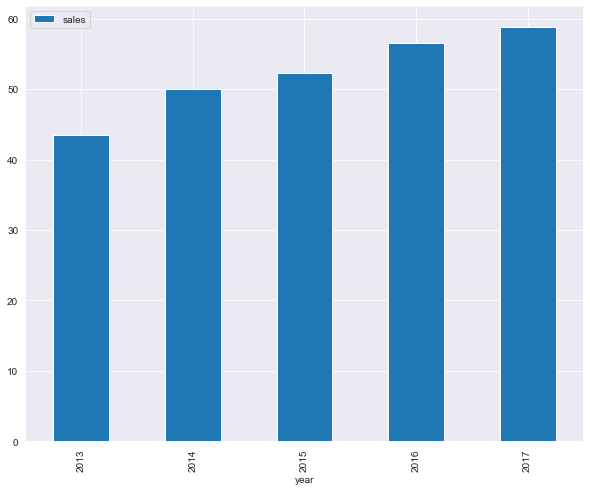

In [84]:
# Plot average Sales by year for all stores 
train[['sales','year']].groupby(['year']).mean().plot.bar(figsize=(10,8))
plt.show()

We can observe that the above graph, there is general increasing mean sales trend in 2017

### >>> Mean Sales by Store by Week Days

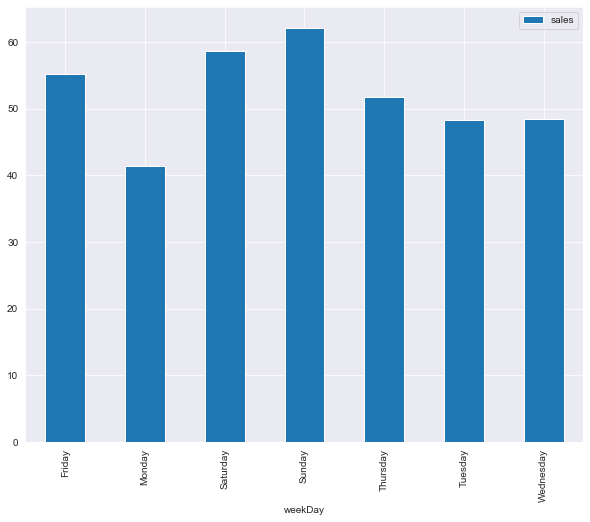

In [86]:
# Plot average Sales by Weekday for all stores 
train[['sales','weekDay']].groupby(['weekDay']).mean().plot.bar(figsize=(10,8))
plt.show()

From the above graph, General sale is increasing on every Sunday in a Weekday's

### <font color='Red'>Plotting relative sales per year for both stores and items

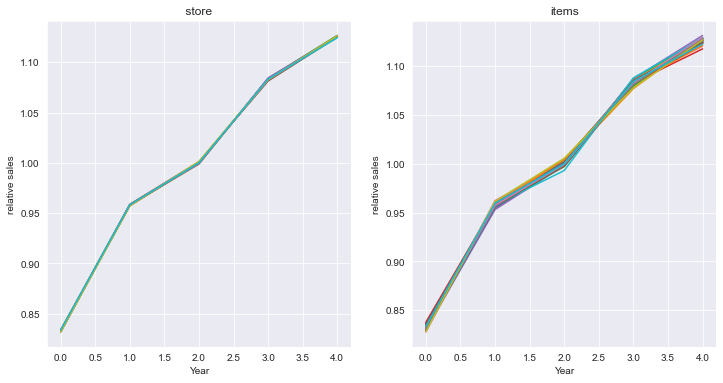

In [37]:
store_sales_trend_year=pd.pivot_table(train,index="year",columns='store',values='sales',aggfunc='mean').values
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(store_sales_trend_year/store_sales_trend_year.mean(0)[np.newaxis])
plt.xlabel("Year")
plt.ylabel("relative sales")
plt.title(" store ")
plt.subplot(1,2,2)

item_sales_trend_year=pd.pivot_table(train,index="year",columns='item',values='sales',aggfunc='mean').values
plt.plot(item_sales_trend_year/item_sales_trend_year.mean(0)[np.newaxis])
plt.xlabel("Year")
plt.ylabel("relative sales")
plt.title("items")
plt.show()

Both stores and items experienced a similar growth trend over the years

### <font color='green'>Relative sales per month for both stores and items

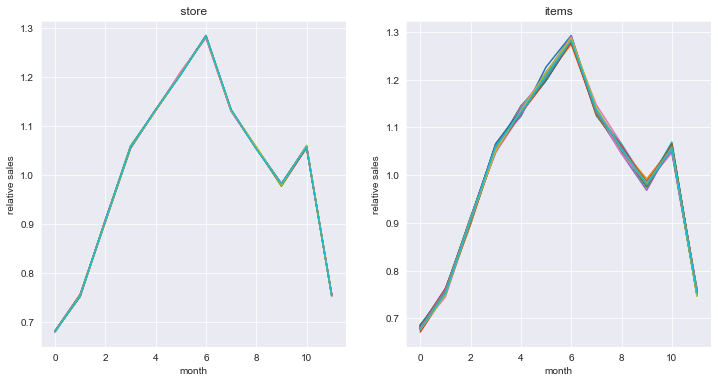

In [39]:
store_sales_trend_month=pd.pivot_table(train,index="month",columns='store',values='sales',aggfunc='mean').values
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(store_sales_trend_month/store_sales_trend_month.mean(0)[np.newaxis])
plt.xlabel("month")
plt.ylabel("relative sales")
plt.title(" store ")
plt.subplot(1,2,2)

item_sales_trend_month=pd.pivot_table(train,index="month",columns='item',values='sales',aggfunc='mean').values
plt.plot(item_sales_trend_month/item_sales_trend_month.mean(0)[np.newaxis])
plt.xlabel("month")
plt.ylabel("relative sales")
plt.title("items")
plt.show()

As with relative sales per year, both store and item sales follow similar trends over the months, with sales increasing during the first half of the year (peaking around June,before decreasing in the second half)

### <font color='orange'>Relative sales per day of week for both stores and items

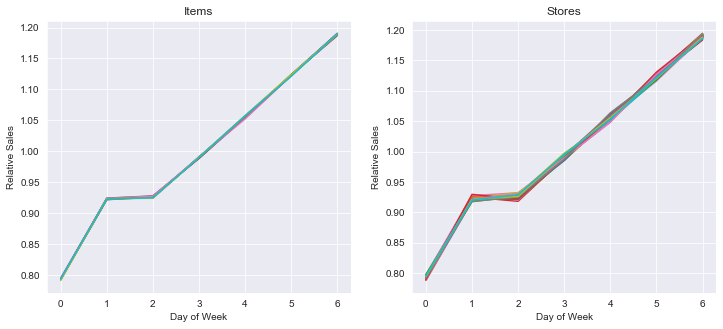

In [41]:
item_sales_trend_day = pd.pivot_table(train, index='day_of_week', columns='item',
                              values='sales', aggfunc='mean').values
store_sales_trend_day = pd.pivot_table(train, index='day_of_week', columns='store',
                               values='sales', aggfunc='mean').values

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(store_sales_trend_day / store_sales_trend_day.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Day of Week")
plt.ylabel("Relative Sales")


plt.subplot(1,2,2)
plt.plot(item_sales_trend_day /item_sales_trend_day.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Day of Week")
plt.ylabel("Relative Sales")
plt.show()

From the graph above, we can see that items and stores seem to have a common pattern over the days of the week.

From the preliminary analysis of the train data set, we can observe that all stores show similar trends and seasonality in the years,albeit with some difference in sales levels.

The data looks to be additive in nature due to progressive increment of sales volume . For our time-series forecasting, we will focus our analysis on 1 store-item pair.

## <font color='purple'>Ensuring Stationarity Data

For Time-Series forecasting to be conducted, we first need to ensure that our data to be stationary. Stationary data refers to data where its mean,standard deviation and covariance do not vary with time. This is an important factor to note in time series analysis to prevent any errorneous and misleading analysis conducted.

In [42]:
# First start with item 1-store 1 pair 
S1_I1=train.loc[(train['store']==1) & (train['item']==1)]
S1_I1.head()

,store,item,sales,year,month,day,day_of_week
date,,,,,,,
2013-01-01,1,1,13,2013,1,1,1
2013-01-02,1,1,11,2013,1,2,2
2013-01-03,1,1,14,2013,1,3,3
2013-01-04,1,1,13,2013,1,4,4
2013-01-05,1,1,10,2013,1,5,5


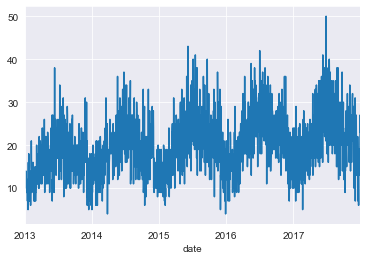

In [44]:
S1_I1['sales'].plot()
plt.show()
# seasonal trend where it peaks at mid-year with general increasing sales over time 

We will now conduct a time series decomposition to break down time series for S1-I1 pair to show trend,seasonal and residual components to determine S1-I1's stationarity

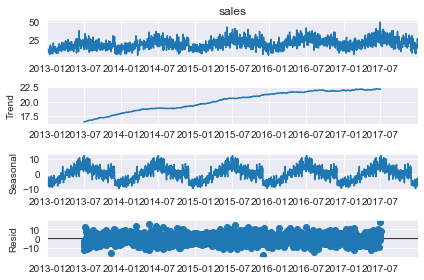

In [52]:
# use freq-365 due to long term nature of data 
plt.figsize=(80,50)
decomposition=seasonal_decompose(S1_I1['sales'],model='additive',freq=365)
fig=decomposition.plot()
plt.show()

From the seasonal decomposition, we can clearly observe a increasing trend and yearly seasonality that exists in the dataset. This is a indication that the data is not stationary.

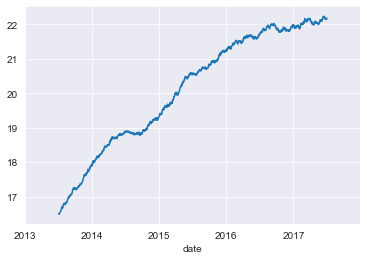

In [55]:
# A better look at the data trend 
trend=decomposition.trend
trend.plot()
plt.figsize=(80,50)
plt.show()

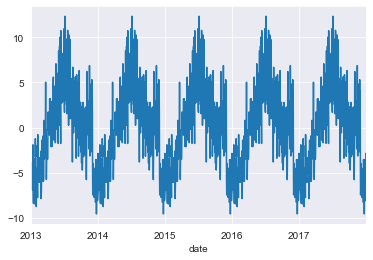

In [57]:
plt.figsize=(50,30)
seasonal = decomposition.seasonal 
seasonal.plot()
plt.show()

Evidence of yearly seasonality with increasing trend

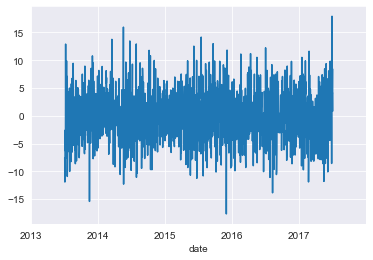

In [59]:
residual = decomposition.resid
residual.plot()
plt.show()

Another way to check for stationarity in the data is to plot moving average and moving standard deviation.

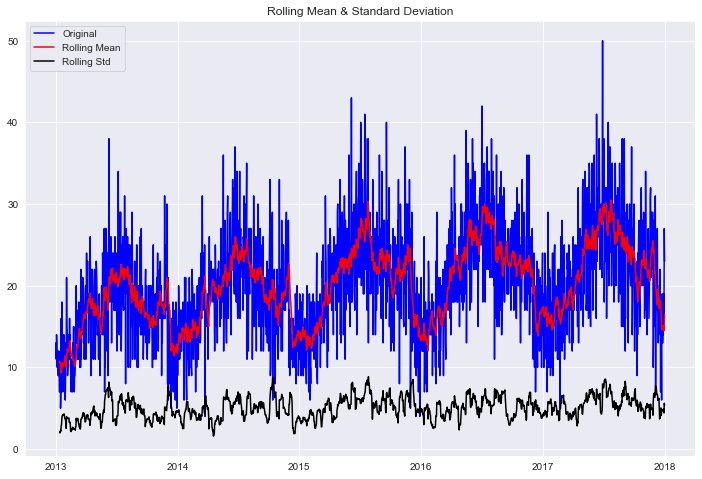

In [60]:
# pLot moving average and moving standard deviation to see if it varies in time 
rolmean = S1_I1['sales'].rolling(window=12).mean()
rolstd = S1_I1['sales'].rolling(window=12).std()

fig = plt.figure(figsize=(12, 8))
orig = plt.plot(S1_I1['sales'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

As seen in the graph above, it is clear that the mean follows the sales trend and is not constant. We can also observe that the moving standard deviation is also fluctuating together with the data

We will now conduct Dickey Fuller test to test the stationarity of the pair.

If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In our above example, the test statistic > critical value, which implies that the series is not stationary. This confirms our original observation which we initially saw in the visual test.

In [61]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1. Test statistic:", dftest[0])
    print("2. P-value:", dftest[1])
    print("3. No of lags:", dftest[2])
    print("4. No of observations used for ADF Regression and critical values calculation:", dftest[3])
    print("5. critical values: ")
    for key,val in dftest[4].items():
        print("\t",key,": ", val)

In [62]:
adf_test(S1_I1['sales'])

1. Test statistic: -3.15767055633282
2. P-value: 0.022569380626570525
3. No of lags: 23
4. No of observations used for ADF Regression and critical values calculation: 1802
5. critical values: 
	 1% :  -3.4339840952648695
	 5% :  -2.8631452508003057
	 10% :  -2.567624583142913


The Dicky-Fuller test results shows the test statistic being higher than critical value at 1% in addtion to upwards trend and seasonality observed. The model is considered not to be stationary

### Use of differencing method to remove any trends in series

In [63]:
# To modify data to obtain stationary pattern
# to use the differencing method to remove 
first_diff= S1_I1.sales-S1_I1.sales.shift(1)
first_diff=first_diff.dropna(inplace=False)
first_diff.head()

date
2013-01-02   -2.0
2013-01-03    3.0
2013-01-04   -1.0
2013-01-05   -3.0
2013-01-06    2.0
Name: sales, dtype: float64

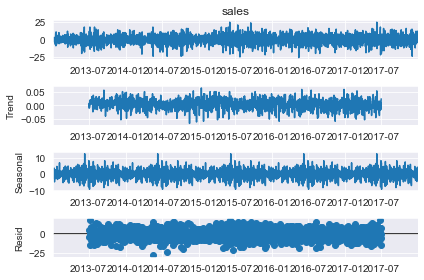

In [64]:
# Perform seasonal decompose on 1st degree differencing series
# use freq-365 due to long term nature of data 
plt.figsize=(50,40)
decomposition=seasonal_decompose(first_diff,model='additive',freq=365)
fig=decomposition.plot()

It can be seen that increasing trend is now removed, and that data values have roughly constant mean and standard deviation

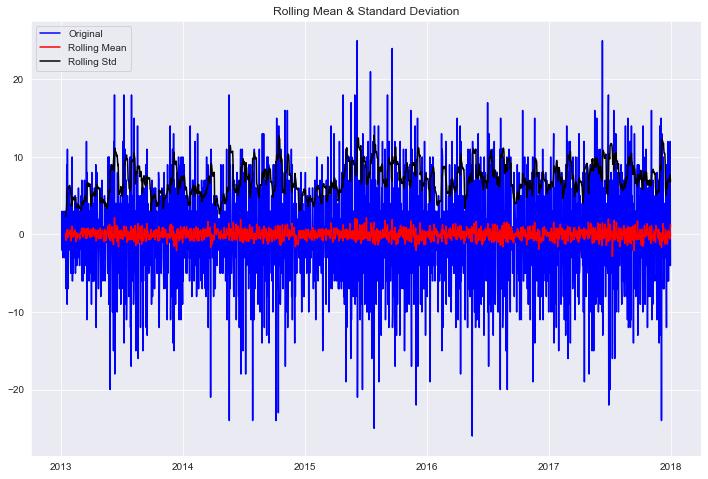

In [65]:
# Replot the rolling mean and standard deviation graphs 
rolmean1 = first_diff.rolling(window=12).mean()
rolstd1 = first_diff.rolling(window=12).std()

fig = plt.figure(figsize=(12, 8))
orig = plt.plot(first_diff, color='blue',label='Original')
mean = plt.plot(rolmean1, color='red', label='Rolling Mean')
std = plt.plot(rolstd1, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [66]:
# Readminister Dicky Fuller test on altered series
adf_test(first_diff)

1. Test statistic: -12.67679388604741
2. P-value: 1.2109276320440464e-23
3. No of lags: 22
4. No of observations used for ADF Regression and critical values calculation: 1802
5. critical values: 
	 1% :  -3.4339840952648695
	 5% :  -2.8631452508003057
	 10% :  -2.567624583142913


We now observe that the p-value is now very small and the Test statistic value isless than 1% critical value. We can conclude that the data is now stationary